# Laboratorio 2
### Entrega: martes 31 de agosto 2021, 23:59 horas
Integrantes:
- Ricardo Coronado
- Eduardo Hopperdietzel
- Diego Sandoval


## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Por posición:  tendencia central y no central
   percentiles, media, moda

2. Por dispersión: 
    Varianza, desviación estándar

3. Por forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize
import random


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*p = p\\
E[X^2] & = & 1*p + 0*p = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

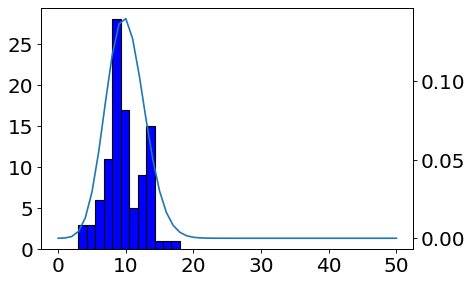

In [2]:
## simulación de size valores v.a. binomial
size=100
n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size)

binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


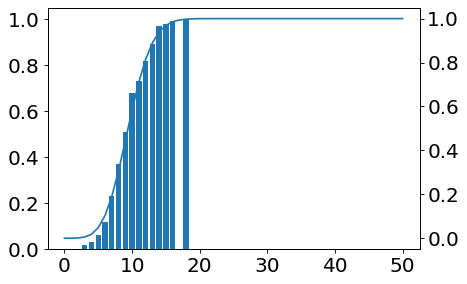

In [3]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [4]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 9.61  teórica:  10.0
varianza empírica: 8.157900000000001  teórica:  8.0
asimetría empírica: 0.2177650621006263 teórica:  0.21213203435596423
curtosis empírico:  -0.07537782157530826 teórico:  0.004999999999999977


#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

| Esperanza teórica | Varianza teórica | Asimetria teórica | Curtosis teórica |
| --- | --- | --- | --- |
| 10.0 | 8.0 | 0.2121 | 0.0049 |



| Size | Esperanza empírica | Varianza empírica | Asimetria empírica | Curtosis empírica |
| --- | --- | --- | --- | ---| 
| 100 | 9.81 | 8.6339 | 0.3877 | -0.607 |
| 1000 | 10.011 | 7.7848 | 0.2433 | -0.082 |
| 5000 | 9.9806 | 7.9198 | 0.1817 | -0.105 |
| 10000 | 9.982 | 8.0736 | 0.1927 | 0.0042 |

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

In [5]:
def percenDiff(a,b):
  return ((b/a) * 100) - 100

def getData(datos_bin):
  promedio = sum(datos_bin)/size
  var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
  asim = stats.skew(datos_bin)
  curtos = stats.kurtosis(datos_bin)
  print('esperanza empírica:',promedio,' ; teórica: ',n*p, '#### diff%: ', percenDiff(promedio, n*p))
  print('varianza empírica:',var_emp,' ; teórica: ', n*p*(1-p), '### diff%: ', percenDiff(var_emp, n*p*(1-p)))
  print('asimetría empírica:', asim, ' ; teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))), '### diff%: ', percenDiff(asim, (1-2*p)/(math.sqrt(n*p*(1-p)))))
  print('curtosis empírico: ', curtos, ' ; teórico: ',(1-6*p*(1-p))/(n*p*(1-p)), '   ### diff%: ', percenDiff(curtos, (1-6*p*(1-p))/(n*p*(1-p))))
  print("")

for i in range(3):
  size = random.randint(1000, 100000)
  n = random.randint(1, 1000)
  p = random.uniform(0, 1)
  datos_bin =stats.binom.rvs(n=n, p=p, size=size)
  print("Size:", size, "; n:", n, "; p:", p)
  getData(datos_bin)


Size: 49283 ; n: 155 ; p: 0.5659433892613209
esperanza empírica: 87.73301138323559  ; teórica:  87.72122533550474 #### diff%:  -0.013433994279949957
varianza empírica: 38.297728705246115  ; teórica:  38.07597775897313 ### diff%:  -0.5790185313068008
asimetría empírica: -0.013376245217538173  ; teórica:  -0.021373504060925242 ### diff%:  59.787023288878686
curtosis empírico:  -0.04188292626638068  ; teórico:  -0.012446399130609232    ### diff%:  -70.28288078190008

Size: 62886 ; n: 474 ; p: 0.572622199195042
esperanza empírica: 271.3470088731991  ; teórica:  271.4229224184499 #### diff%:  0.02797655502672569
varianza empírica: 115.98390058788124  ; teórica:  116.00013167125185 ### diff%:  0.013994255485755502
asimetría empírica: -0.0022513553821465384  ; teórica:  -0.013485596184956839 ### diff%:  498.99899819899133
curtosis empírico:  -0.014210441626061776  ; teórico:  -0.004037547978236699    ### diff%:  -71.58745600958744

Size: 91637 ; n: 775 ; p: 0.3002876492147043
esperanza empíri

Efectivamente hay cambios 

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

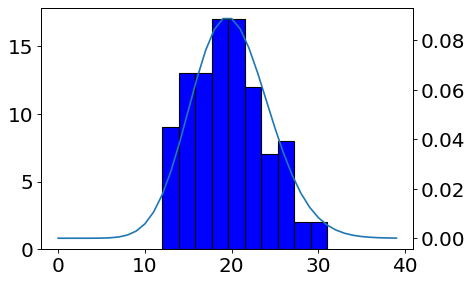

In [6]:
## simulación de size valores v.a. poisson
size = 100
mu = 20
datos_poisson =stats.poisson.rvs(mu=mu, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_poisson, color = 'blue', edgecolor = 'black', bins = int(40/binwidth))
## probabilidad teórica
ax2 = ax.twinx()

vec = list(range(40))
##

pvec = []
for i in vec:
    pvec.append(stats.poisson.pmf(k=i, mu=mu))
ax2.plot(vec,pvec)
plt.draw()

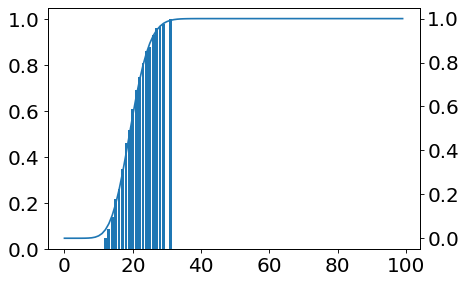

In [7]:
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x, cum_poisson = ecdf(np.reshape(datos_poisson, -1)) # no tenemos claro por qué es necesario ese reshape
ax.bar(x,cum_poisson)

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(100))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.cdf(k=i, mu=mu))
ax2.plot(vec,pvec)
plt.draw()


In [8]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_poisson)/size
var_emp = sum((datos_poisson - promedio)*(datos_poisson-promedio))/size
asim = stats.skew(datos_poisson)
curtos = stats.kurtosis(datos_poisson)

mean, var, skew, kurt = stats.poisson.stats(mu, moments='mvsk')


print('esperanza empírica:',promedio,' teórica: ', mean)
print('varianza empírica:',var_emp,' teórica: ', var)
print('asimetría empírica:', asim, 'teórica: ', skew)
print('curtosis empírico: ', curtos, 'teórico: ', kurt)

esperanza empírica: 19.49  teórica:  20.0
varianza empírica: 19.949900000000003  teórica:  20.0
asimetría empírica: 0.36592022383287615 teórica:  0.22360679774997896
curtosis empírico:  -0.3926415705829496 teórico:  0.05


#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

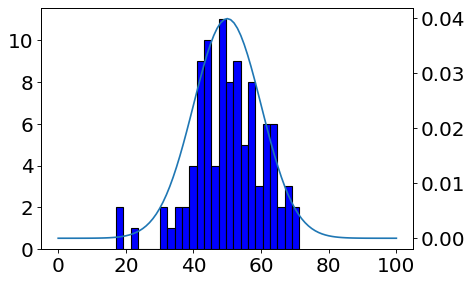

In [9]:
## simulación de size valores v.a. normal
size=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


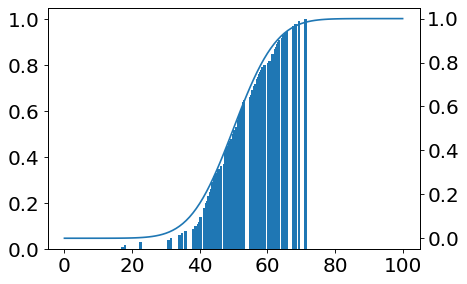

In [10]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [11]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 50.09316183502695  teórica:  50
varianza empírica: 111.47719820934869  teórica:  100
asimetría empírica: -0.49420606636569187 teórica:  0
curtosis empírico:  0.6420050369955201 teórico:  0


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída chi-cuadrado de $k$ grados de libertad

#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

##### Respuesta
Región 1: 

- latitud: [-45, -35] # Linares hasta Puerto Aysén
- longitud: [-80, -72] # Frontera con Argentina hasta oceano pacífico

Región 2:

- latitud: [-30, -20] # Iquique hasta La Serena
- longitud: [-80 ,-68]  # Frontera con Argentina hasta oceano pacífico


In [17]:
def printResults(df):
    promedio = sum(df)/df.size
    var_emp = sum((df - promedio)*(df-promedio))/df.size
    asim = stats.skew(df)
    curtos = stats.kurtosis(df)
    print("promedio: ", promedio)
    print("varianza: ",var_emp)
    print("Asimetría: ", asim)
    print("Curtosis: ", curtos)
    print("\n")
    
data1 = pd.read_csv('data/region1.txt', delimiter= '\t')
data2 = pd.read_csv('data/region2.txt', delimiter= '\t')
display("Región de estudio 1 ")
display(data1.head(3))
display("Región de estudio 2 ")
display(data2.head(3))


'Región de estudio 1 '

,Fecha (UTC),Latitud [º],Longitud [º],Profundidad [km],Magnitud [*]
0,2018-07-02 02:45:32,-37.75,-72.74,40,4.3
1,2018-01-21 14:42:53,-36.07,-73.29,32,4.2
2,2019-09-26 16:36:17,-40.83,-72.29,140,6.0


'Región de estudio 2 '

,Fecha (UTC),Latitud [º],Longitud [º],Profundidad [km],Magnitud [*]
0,2019-08-28 12:43:44,-23.13,-69.23,108,5.2
1,2019-08-14 21:33:12,-20.74,-70.11,30,4.2
2,2019-01-31 19:49:50,-20.46,-69.00,102,4.0


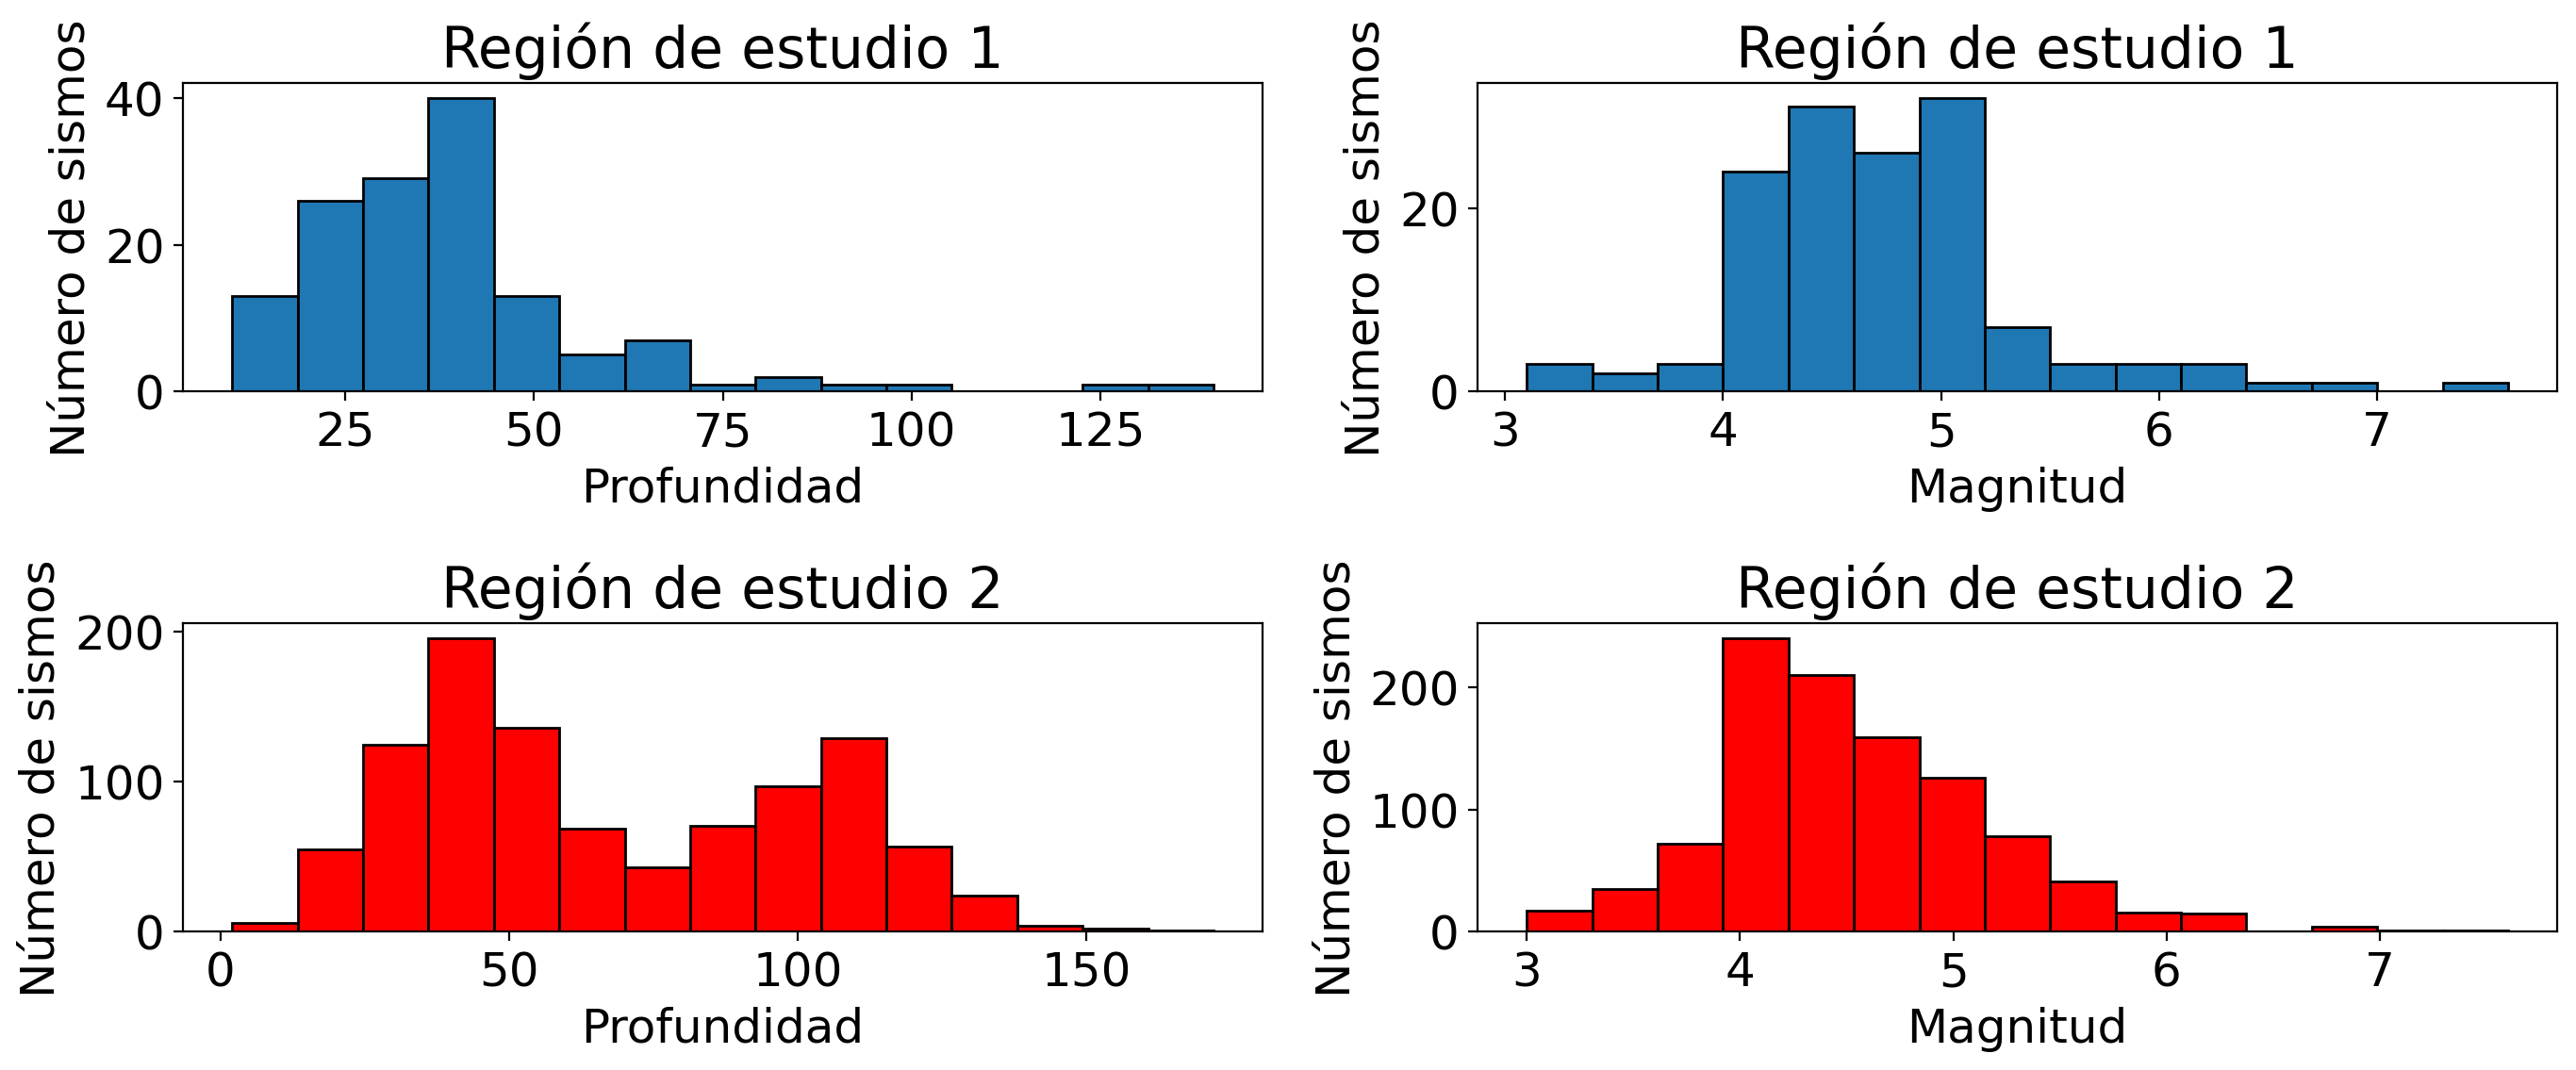

In [20]:
df1 = data1.iloc[:,3]
df2 = data1.iloc[:,4]
df3 = data2.iloc[:,3]
df4 = data2.iloc[:,4]

fig, axs = plt.subplots(2,2,figsize=(14, 6), tight_layout=True)
axs[0,0].hist(df1, edgecolor = 'black',bins = 15)
axs[0,0].set_xlabel('Profundidad')
axs[0,0].set_ylabel('Número de sismos')
axs[0,0].set_title('Región de estudio 1')

axs[0,1].hist(df2, edgecolor = 'black',bins = 15)
axs[0,1].set_xlabel('Magnitud')
axs[0,1].set_ylabel('Número de sismos')
axs[0,1].set_title('Región de estudio 1')

axs[1,0].hist(df3,color='red', edgecolor = 'black',bins = 15)
axs[1,0].set_xlabel('Profundidad')
axs[1,0].set_ylabel('Número de sismos')
axs[1,0].set_title('Región de estudio 2')

axs[1,1].hist(df4, color='red', edgecolor = 'black',bins=15)
axs[1,1].set_xlabel('Magnitud')
axs[1,1].set_ylabel('Número de sismos')
axs[1,1].set_title('Región de estudio 2')

plt.show()


In [19]:
print("Región de estudio 1: Profundidad")
printResults(df1)
print("Región de estudio 1: Magnitud")
printResults(df2)
print("Región de estudio 2: Profundidad")
printResults(df3)
print("Región de estudio 2: Magnitud")
printResults(df4)

Región de estudio 1: Profundidad
promedio:  38.042857142857144
varianza:  389.74102040816337
Asimetría:  2.0717395883621275
Curtosis:  6.946273216366439


Región de estudio 1: Magnitud
promedio:  4.690714285714288
varianza:  0.4314137755102038
Asimetría:  1.020342515068358
Curtosis:  3.0465034304451892


Región de estudio 2: Profundidad
promedio:  67.78916256157636
varianza:  1129.2087495450041
Asimetría:  0.35373522550743375
Curtosis:  -1.131254307389445


Región de estudio 2: Magnitud
promedio:  4.53330049261083
varianza:  0.38346250576330443
Asimetría:  0.6834139788286578
Curtosis:  1.2230840088722301




La región 1 corresponde a la zona sur y la región 2 corresponde a la zona norte entre Iquique y La Serena.

El histograma de produndidad de la región 1 es unimodal y el de la región 2 es bimodal, esto puede deberse a las diferencias geográficas de las regiones. 

En cuanto a magnitud, la mayoría de los sismos se encuentran entre los 4 a 5 grados.

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
